In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("GPU is not available.")


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is available.


In [2]:
def count_classes_in_dataloader(dataloader):
    class_set = set()
    for _, labels in dataloader:
        class_set.update(labels.unique().tolist())
    num_classes = len(class_set)
    return num_classes

In [3]:
from train import Trainer
from model import Discriminator , EfficientNetV2 , HybridCNNTransformer
from dataloader import create_normal_dataloader , create_pair_dataloader
from utils import load_checkpoint
import torch
import pandas as pd
import config
# train_loader , test_loader = create_dataloader(None,None)
# model = Discriminator(num_classes=82,num_features=config.FEATURE_DIM)
model = HybridCNNTransformer(num_classes=82)
# load_checkpoint('logs/checkpoints.pt',model)
trainer = Trainer(model=model)
# model(torch.randn(1,3,150,150))[0].shape
val_pair_df = pd.read_csv('Dataset/val_pairs.csv')
test_pair_df = pd.read_csv('Dataset/test_pairs.csv')
train_loader , test_loader = create_normal_dataloader(None,None)
# val_pair_dataloader , test_pair_dataloader = create_pair_dataloader(val_pair_df,test_pair_df)

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


num_classes of dataset 82


In [4]:
import config
import torch
import os
avg_meter = trainer.fit(trainloader=train_loader,val_loader=test_loader,num_epochs=config.NUM_EPOCHS)

  0%|          | 0/11 [00:00<?, ?it/s]c:\Users\pc\projects\AiRoshanIntenrship\SimilarityProject\losses\center_loss.py:31: UserWarning: This overload of addmm_ is deprecated:
	addmm_(Number beta, Number alpha, Tensor mat1, Tensor mat2)
Consider using one of the following signatures instead:
	addmm_(Tensor mat1, Tensor mat2, *, Number beta, Number alpha) (Triggered internally at ..\torch\csrc\utils\python_arg_parser.cpp:1420.)
  distmat.addmm_(1, -2, x, self.centers.t())
100%|██████████| 3/3 [00:08<00:00,  2.93s/it]


Epoch 1 | 


100%|██████████| 8/8 [00:52<00:00,  6.59s/it]


Train SimilarityDifference: 0.2277 | Train Mean Cosine Similarity for being Similar: 0.7201 | Train Mean Cosine Similarity for not being similar: 0.4924 | Train ROC-AUC-Score: 0.9386 | Train Data_Pair_F1-Score: 0.8809 | Train Data_Pair_Precision: 0.7875 | Data_Pair_Recall: 0.9993 |Train Data_Pair_Accuracy: 0.7973


100%|██████████| 4/4 [00:26<00:00,  6.52s/it]


 Val SimilarityDifference: 0.1233 | Val Mean Cosine Similarity for being Similar: 0.6768 | Val Mean Cosine Similarity for not being similar: 0.5536 | Val ROC-AUC-Score: 0.8722 | Val Data_Pair_F1-Score: 0.6741 | Val Data_Pair_Precision: 0.5084 | Val Data_Pair_Recall: 1.0000 | Val Data_Pair_Accuracy: 0.5165


100%|██████████| 3/3 [00:08<00:00,  2.92s/it]


Epoch 2 | train_loss: 54.4179 | train_accuracy: 0.2015 | train_f1_score: 0.1720 | train_center_loss: 556.4263 | train_arc_face: 0.5051 | train_cross_entropy: 41.6651 | Val Loss: 50.1273 | Val Acc: 0.4841 | Val F1-Score: 0.3954 | val_center_loss: 142.6541 | val_arc_face: 0.0673 | val_cross_entropy: 7.6605 | val_pair_f1: 0.6741 | val_pair_precision: 0.5084 | val_pair_recall: 1.0000 | val_pair_accuracy: 0.5165 | val_pair_roc_auc: 0.8722 | val_is_similar: 0.6768 | val_not_similar: 0.5536 | 


100%|██████████| 8/8 [00:52<00:00,  6.50s/it]


Train SimilarityDifference: 0.3695 | Train Mean Cosine Similarity for being Similar: 0.6390 | Train Mean Cosine Similarity for not being similar: 0.2695 | Train ROC-AUC-Score: 0.9539 | Train Data_Pair_F1-Score: 0.9345 | Train Data_Pair_Precision: 0.9364 | Data_Pair_Recall: 0.9327 |Train Data_Pair_Accuracy: 0.9020


100%|██████████| 4/4 [00:26<00:00,  6.52s/it]


 Val SimilarityDifference: 0.1870 | Val Mean Cosine Similarity for being Similar: 0.5439 | Val Mean Cosine Similarity for not being similar: 0.3570 | Val ROC-AUC-Score: 0.8623 | Val Data_Pair_F1-Score: 0.7854 | Val Data_Pair_Precision: 0.7021 | Val Data_Pair_Recall: 0.8910 | Val Data_Pair_Accuracy: 0.7565


100%|██████████| 3/3 [00:09<00:00,  3.23s/it]


Epoch 3 | train_loss: 47.2818 | train_accuracy: 0.5429 | train_f1_score: 0.4751 | train_center_loss: 496.2672 | train_arc_face: 0.1643 | train_cross_entropy: 23.6679 | Val Loss: 44.5470 | Val Acc: 0.6853 | Val F1-Score: 0.6236 | val_center_loss: 129.5099 | val_arc_face: 0.0249 | val_cross_entropy: 4.1062 | val_pair_f1: 0.7854 | val_pair_precision: 0.7021 | val_pair_recall: 0.8910 | val_pair_accuracy: 0.7565 | val_pair_roc_auc: 0.8623 | val_is_similar: 0.5439 | val_not_similar: 0.3570 | 


100%|██████████| 8/8 [00:57<00:00,  7.15s/it]


Train SimilarityDifference: 0.4109 | Train Mean Cosine Similarity for being Similar: 0.6042 | Train Mean Cosine Similarity for not being similar: 0.1933 | Train ROC-AUC-Score: 0.9568 | Train Data_Pair_F1-Score: 0.9106 | Train Data_Pair_Precision: 0.9622 | Data_Pair_Recall: 0.8643 |Train Data_Pair_Accuracy: 0.8728


100%|██████████| 4/4 [00:28<00:00,  7.02s/it]


 Val SimilarityDifference: 0.2058 | Val Mean Cosine Similarity for being Similar: 0.4821 | Val Mean Cosine Similarity for not being similar: 0.2762 | Val ROC-AUC-Score: 0.8601 | Val Data_Pair_F1-Score: 0.7603 | Val Data_Pair_Precision: 0.7920 | Val Data_Pair_Recall: 0.7310 | Val Data_Pair_Accuracy: 0.7695


100%|██████████| 3/3 [00:09<00:00,  3.18s/it]


Epoch 4 | train_loss: 43.3541 | train_accuracy: 0.7180 | train_f1_score: 0.6759 | train_center_loss: 462.7693 | train_arc_face: 0.0764 | train_cross_entropy: 14.0491 | Val Loss: 41.5267 | Val Acc: 0.7754 | Val F1-Score: 0.7488 | val_center_loss: 121.6643 | val_arc_face: 0.0163 | val_cross_entropy: 2.8995 | val_pair_f1: 0.7603 | val_pair_precision: 0.7920 | val_pair_recall: 0.7310 | val_pair_accuracy: 0.7695 | val_pair_roc_auc: 0.8601 | val_is_similar: 0.4821 | val_not_similar: 0.2762 | 


100%|██████████| 8/8 [00:55<00:00,  6.99s/it]


Train SimilarityDifference: 0.4342 | Train Mean Cosine Similarity for being Similar: 0.5892 | Train Mean Cosine Similarity for not being similar: 0.1550 | Train ROC-AUC-Score: 0.9628 | Train Data_Pair_F1-Score: 0.9061 | Train Data_Pair_Precision: 0.9754 | Data_Pair_Recall: 0.8460 |Train Data_Pair_Accuracy: 0.8685


100%|██████████| 4/4 [00:29<00:00,  7.40s/it]


 Val SimilarityDifference: 0.2116 | Val Mean Cosine Similarity for being Similar: 0.4546 | Val Mean Cosine Similarity for not being similar: 0.2431 | Val ROC-AUC-Score: 0.8579 | Val Data_Pair_F1-Score: 0.7345 | Val Data_Pair_Precision: 0.8393 | Val Data_Pair_Recall: 0.6530 | Val Data_Pair_Accuracy: 0.7640


100%|██████████| 3/3 [00:09<00:00,  3.19s/it]


Epoch 5 | train_loss: 40.8272 | train_accuracy: 0.7944 | train_f1_score: 0.7854 | train_center_loss: 439.1698 | train_arc_face: 0.0510 | train_cross_entropy: 9.8788 | Val Loss: 39.4956 | Val Acc: 0.8197 | Val F1-Score: 0.8089 | val_center_loss: 116.2448 | val_arc_face: 0.0128 | val_cross_entropy: 2.2292 | val_pair_f1: 0.7345 | val_pair_precision: 0.8393 | val_pair_recall: 0.6530 | val_pair_accuracy: 0.7640 | val_pair_roc_auc: 0.8579 | val_is_similar: 0.4546 | val_not_similar: 0.2431 | 


100%|██████████| 8/8 [00:55<00:00,  6.88s/it]


Train SimilarityDifference: 0.4427 | Train Mean Cosine Similarity for being Similar: 0.5809 | Train Mean Cosine Similarity for not being similar: 0.1382 | Train ROC-AUC-Score: 0.9661 | Train Data_Pair_F1-Score: 0.8953 | Train Data_Pair_Precision: 0.9802 | Data_Pair_Recall: 0.8240 |Train Data_Pair_Accuracy: 0.8555


100%|██████████| 4/4 [00:27<00:00,  6.84s/it]


 Val SimilarityDifference: 0.2162 | Val Mean Cosine Similarity for being Similar: 0.4302 | Val Mean Cosine Similarity for not being similar: 0.2140 | Val ROC-AUC-Score: 0.8644 | Val Data_Pair_F1-Score: 0.6919 | Val Data_Pair_Precision: 0.8686 | Val Data_Pair_Recall: 0.5750 | Val Data_Pair_Accuracy: 0.7440


100%|██████████| 3/3 [00:09<00:00,  3.05s/it]


Epoch 6 | train_loss: 38.7122 | train_accuracy: 0.8269 | train_f1_score: 0.8216 | train_center_loss: 418.3987 | train_arc_face: 0.0377 | train_cross_entropy: 7.3972 | Val Loss: 37.9111 | Val Acc: 0.8291 | Val F1-Score: 0.8180 | val_center_loss: 111.7464 | val_arc_face: 0.0106 | val_cross_entropy: 1.9764 | val_pair_f1: 0.6919 | val_pair_precision: 0.8686 | val_pair_recall: 0.5750 | val_pair_accuracy: 0.7440 | val_pair_roc_auc: 0.8644 | val_is_similar: 0.4302 | val_not_similar: 0.2140 | 


100%|██████████| 8/8 [00:55<00:00,  6.99s/it]


Train SimilarityDifference: 0.4464 | Train Mean Cosine Similarity for being Similar: 0.5758 | Train Mean Cosine Similarity for not being similar: 0.1294 | Train ROC-AUC-Score: 0.9680 | Train Data_Pair_F1-Score: 0.8958 | Train Data_Pair_Precision: 0.9852 | Data_Pair_Recall: 0.8213 |Train Data_Pair_Accuracy: 0.8568


100%|██████████| 4/4 [00:28<00:00,  7.00s/it]


 Val SimilarityDifference: 0.2143 | Val Mean Cosine Similarity for being Similar: 0.4183 | Val Mean Cosine Similarity for not being similar: 0.2039 | Val ROC-AUC-Score: 0.8634 | Val Data_Pair_F1-Score: 0.6646 | Val Data_Pair_Precision: 0.8744 | Val Data_Pair_Recall: 0.5360 | Val Data_Pair_Accuracy: 0.7295


100%|██████████| 3/3 [00:08<00:00,  2.94s/it]


Epoch 7 | train_loss: 37.2533 | train_accuracy: 0.8566 | train_f1_score: 0.8463 | train_center_loss: 403.1979 | train_arc_face: 0.0327 | train_cross_entropy: 6.5552 | Val Loss: 36.6359 | Val Acc: 0.8462 | Val F1-Score: 0.8357 | val_center_loss: 108.0479 | val_arc_face: 0.0099 | val_cross_entropy: 1.8497 | val_pair_f1: 0.6646 | val_pair_precision: 0.8744 | val_pair_recall: 0.5360 | val_pair_accuracy: 0.7295 | val_pair_roc_auc: 0.8634 | val_is_similar: 0.4183 | val_not_similar: 0.2039 | 


100%|██████████| 8/8 [00:54<00:00,  6.84s/it]


Train SimilarityDifference: 0.4470 | Train Mean Cosine Similarity for being Similar: 0.5714 | Train Mean Cosine Similarity for not being similar: 0.1245 | Train ROC-AUC-Score: 0.9684 | Train Data_Pair_F1-Score: 0.8865 | Train Data_Pair_Precision: 0.9873 | Data_Pair_Recall: 0.8043 |Train Data_Pair_Accuracy: 0.8455


100%|██████████| 4/4 [00:27<00:00,  6.85s/it]


 Val SimilarityDifference: 0.2107 | Val Mean Cosine Similarity for being Similar: 0.3958 | Val Mean Cosine Similarity for not being similar: 0.1851 | Val ROC-AUC-Score: 0.8602 | Val Data_Pair_F1-Score: 0.6198 | Val Data_Pair_Precision: 0.8881 | Val Data_Pair_Recall: 0.4760 | Val Data_Pair_Accuracy: 0.7080


100%|██████████| 3/3 [00:09<00:00,  3.11s/it]


Epoch 8 | train_loss: 36.1965 | train_accuracy: 0.8624 | train_f1_score: 0.8523 | train_center_loss: 392.1765 | train_arc_face: 0.0298 | train_cross_entropy: 5.9553 | Val Loss: 35.5288 | Val Acc: 0.8555 | Val F1-Score: 0.8517 | val_center_loss: 104.9074 | val_arc_face: 0.0092 | val_cross_entropy: 1.6698 | val_pair_f1: 0.6198 | val_pair_precision: 0.8881 | val_pair_recall: 0.4760 | val_pair_accuracy: 0.7080 | val_pair_roc_auc: 0.8602 | val_is_similar: 0.3958 | val_not_similar: 0.1851 | 


100%|██████████| 8/8 [00:54<00:00,  6.84s/it]


Train SimilarityDifference: 0.4441 | Train Mean Cosine Similarity for being Similar: 0.5732 | Train Mean Cosine Similarity for not being similar: 0.1291 | Train ROC-AUC-Score: 0.9705 | Train Data_Pair_F1-Score: 0.8920 | Train Data_Pair_Precision: 0.9847 | Data_Pair_Recall: 0.8153 |Train Data_Pair_Accuracy: 0.8520


100%|██████████| 4/4 [00:28<00:00,  7.10s/it]


 Val SimilarityDifference: 0.2059 | Val Mean Cosine Similarity for being Similar: 0.4089 | Val Mean Cosine Similarity for not being similar: 0.2030 | Val ROC-AUC-Score: 0.8610 | Val Data_Pair_F1-Score: 0.6532 | Val Data_Pair_Precision: 0.8868 | Val Data_Pair_Recall: 0.5170 | Val Data_Pair_Accuracy: 0.7255


100%|██████████| 3/3 [00:09<00:00,  3.13s/it]


Epoch 9 | train_loss: 34.9400 | train_accuracy: 0.8799 | train_f1_score: 0.8762 | train_center_loss: 379.3077 | train_arc_face: 0.0235 | train_cross_entropy: 5.0088 | Val Loss: 34.7100 | Val Acc: 0.8570 | Val F1-Score: 0.8515 | val_center_loss: 102.4672 | val_arc_face: 0.0090 | val_cross_entropy: 1.6537 | val_pair_f1: 0.6532 | val_pair_precision: 0.8868 | val_pair_recall: 0.5170 | val_pair_accuracy: 0.7255 | val_pair_roc_auc: 0.8610 | val_is_similar: 0.4089 | val_not_similar: 0.2030 | 


100%|██████████| 8/8 [00:53<00:00,  6.73s/it]


Train SimilarityDifference: 0.4507 | Train Mean Cosine Similarity for being Similar: 0.5667 | Train Mean Cosine Similarity for not being similar: 0.1160 | Train ROC-AUC-Score: 0.9717 | Train Data_Pair_F1-Score: 0.8855 | Train Data_Pair_Precision: 0.9893 | Data_Pair_Recall: 0.8013 |Train Data_Pair_Accuracy: 0.8445


100%|██████████| 4/4 [00:26<00:00,  6.63s/it]


 Val SimilarityDifference: 0.2107 | Val Mean Cosine Similarity for being Similar: 0.4013 | Val Mean Cosine Similarity for not being similar: 0.1906 | Val ROC-AUC-Score: 0.8664 | Val Data_Pair_F1-Score: 0.6381 | Val Data_Pair_Precision: 0.8877 | Val Data_Pair_Recall: 0.4980 | Val Data_Pair_Accuracy: 0.7175


100%|██████████| 3/3 [00:08<00:00,  2.93s/it]


Epoch 10 | train_loss: 34.1872 | train_accuracy: 0.8840 | train_f1_score: 0.8762 | train_center_loss: 371.0959 | train_arc_face: 0.0224 | train_cross_entropy: 4.9404 | Val Loss: 33.8432 | Val Acc: 0.8570 | Val F1-Score: 0.8508 | val_center_loss: 99.9292 | val_arc_face: 0.0080 | val_cross_entropy: 1.5925 | val_pair_f1: 0.6381 | val_pair_precision: 0.8877 | val_pair_recall: 0.4980 | val_pair_accuracy: 0.7175 | val_pair_roc_auc: 0.8664 | val_is_similar: 0.4013 | val_not_similar: 0.1906 | 


100%|██████████| 8/8 [00:54<00:00,  6.76s/it]


Train SimilarityDifference: 0.4535 | Train Mean Cosine Similarity for being Similar: 0.5604 | Train Mean Cosine Similarity for not being similar: 0.1069 | Train ROC-AUC-Score: 0.9715 | Train Data_Pair_F1-Score: 0.8789 | Train Data_Pair_Precision: 0.9904 | Data_Pair_Recall: 0.7900 |Train Data_Pair_Accuracy: 0.8367


100%|██████████| 4/4 [00:26<00:00,  6.67s/it]


 Val SimilarityDifference: 0.2104 | Val Mean Cosine Similarity for being Similar: 0.3817 | Val Mean Cosine Similarity for not being similar: 0.1713 | Val ROC-AUC-Score: 0.8655 | Val Data_Pair_F1-Score: 0.5827 | Val Data_Pair_Precision: 0.9034 | Val Data_Pair_Recall: 0.4300 | Val Data_Pair_Accuracy: 0.6920


100%|██████████| 3/3 [00:09<00:00,  3.05s/it]


Epoch 11 | train_loss: 33.1195 | train_accuracy: 0.8885 | train_f1_score: 0.8858 | train_center_loss: 359.8607 | train_arc_face: 0.0204 | train_cross_entropy: 4.4338 | Val Loss: 33.0192 | Val Acc: 0.8695 | Val F1-Score: 0.8656 | val_center_loss: 97.5356 | val_arc_face: 0.0075 | val_cross_entropy: 1.5146 | val_pair_f1: 0.5827 | val_pair_precision: 0.9034 | val_pair_recall: 0.4300 | val_pair_accuracy: 0.6920 | val_pair_roc_auc: 0.8655 | val_is_similar: 0.3817 | val_not_similar: 0.1713 | 


100%|██████████| 8/8 [00:53<00:00,  6.64s/it]


Train SimilarityDifference: 0.4555 | Train Mean Cosine Similarity for being Similar: 0.5626 | Train Mean Cosine Similarity for not being similar: 0.1071 | Train ROC-AUC-Score: 0.9721 | Train Data_Pair_F1-Score: 0.8800 | Train Data_Pair_Precision: 0.9904 | Data_Pair_Recall: 0.7917 |Train Data_Pair_Accuracy: 0.8380


100%|██████████| 4/4 [00:26<00:00,  6.58s/it]


 Val SimilarityDifference: 0.2083 | Val Mean Cosine Similarity for being Similar: 0.3822 | Val Mean Cosine Similarity for not being similar: 0.1739 | Val ROC-AUC-Score: 0.8638 | Val Data_Pair_F1-Score: 0.5980 | Val Data_Pair_Precision: 0.9030 | Val Data_Pair_Recall: 0.4470 | Val Data_Pair_Accuracy: 0.6995


100%|██████████| 3/3 [00:09<00:00,  3.10s/it]


Epoch 12 | train_loss: 32.2098 | train_accuracy: 0.9024 | train_f1_score: 0.9076 | train_center_loss: 350.3229 | train_arc_face: 0.0180 | train_cross_entropy: 3.9667 | Val Loss: 32.2792 | Val Acc: 0.8516 | Val F1-Score: 0.8495 | val_center_loss: 95.2393 | val_arc_face: 0.0072 | val_cross_entropy: 1.5911 | val_pair_f1: 0.5980 | val_pair_precision: 0.9030 | val_pair_recall: 0.4470 | val_pair_accuracy: 0.6995 | val_pair_roc_auc: 0.8638 | val_is_similar: 0.3822 | val_not_similar: 0.1739 | 


100%|██████████| 8/8 [00:57<00:00,  7.19s/it]


Train SimilarityDifference: 0.4572 | Train Mean Cosine Similarity for being Similar: 0.5668 | Train Mean Cosine Similarity for not being similar: 0.1096 | Train ROC-AUC-Score: 0.9746 | Train Data_Pair_F1-Score: 0.8859 | Train Data_Pair_Precision: 0.9905 | Data_Pair_Recall: 0.8013 |Train Data_Pair_Accuracy: 0.8452


100%|██████████| 4/4 [00:27<00:00,  6.87s/it]


 Val SimilarityDifference: 0.2030 | Val Mean Cosine Similarity for being Similar: 0.3849 | Val Mean Cosine Similarity for not being similar: 0.1819 | Val ROC-AUC-Score: 0.8588 | Val Data_Pair_F1-Score: 0.5993 | Val Data_Pair_Precision: 0.8931 | Val Data_Pair_Recall: 0.4510 | Val Data_Pair_Accuracy: 0.6985


 27%|██▋       | 3/11 [02:03<05:30, 41.31s/it]


KeyboardInterrupt: 

In [ ]:
avg_meter.plot_all_metrics()

<Figure size 1500x0 with 0 Axes>

In [ ]:
avg_meter

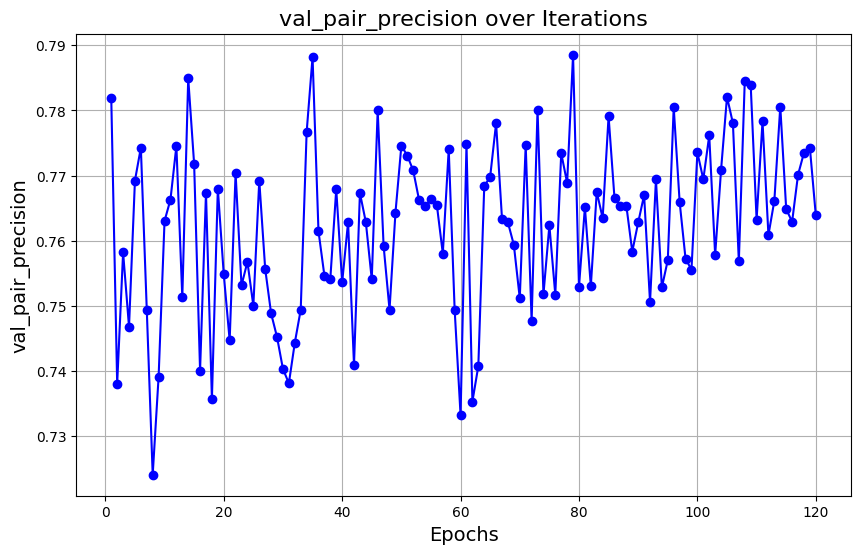

In [ ]:
avg_meter.plot_metric('val_pair_precision')

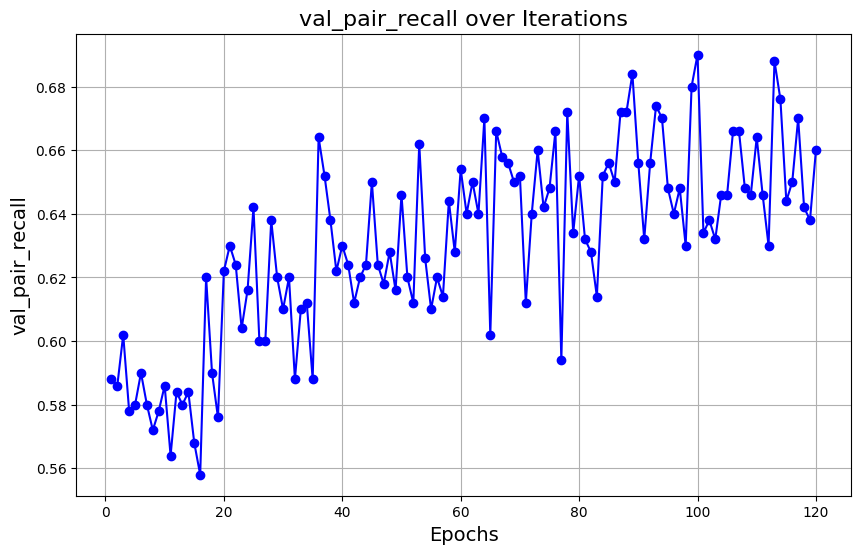

In [ ]:
avg_meter.plot_metric('val_pair_recall')

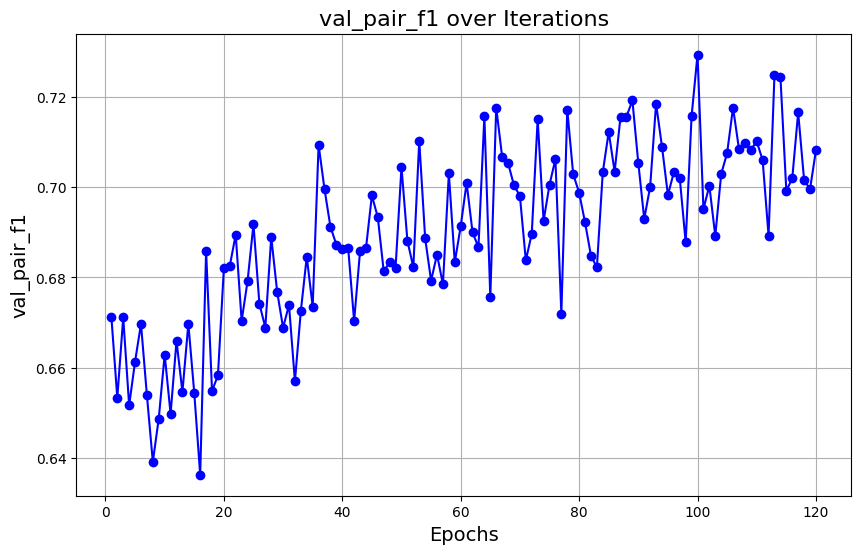

In [ ]:
avg_meter.plot_metric('val_pair_f1')

In [ ]:
from typing import List, Tuple
from model import CosineSimilarity
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import PIL
from tqdm import tqdm
import torch.nn as nn
import torchvision
from model import Discriminator
from utils import load_checkpoint

def retrieve_similar_images(image_path: str, model, data_folder: str):
    """
    Given an input image, a trained Discriminator model, and a folder containing images,
    return the 10 most similar images to the input image using cosine similarity.

    :param image_path: The path to the input image
    :param model: A trained Discriminator model
    :param data_folder: The path to the folder containing images
    :return: A list of tuples containing the 10 most similar images and their cosine similarity scores
    """
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    # Load the input image
    input_image = transform(PIL.Image.open(image_path)).cuda()

    # Extract features from the input image
    model.eval()
    with torch.no_grad():
        image_features, _ = model(input_image.unsqueeze(0))

    cosine_similarity = nn.CosineSimilarity(dim=1)

    similarities = []
    # Load and process images from the data folder
    data_images = torchvision.datasets.ImageFolder(data_folder, transform=transform)
    for sample in tqdm(data_images):
        sample_features, _ = model(sample[0].unsqueeze(0).cuda())
        similarity = cosine_similarity(sample_features, image_features)
        similarities.append((sample[0].permute(1, 2, 0), similarity.item()))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:10]


def plot_images(images, nrows: int = 1, ncols: int = 10):
    """
    Given a list of images, plot them in a grid with the specified number of rows and columns.
    
    :param images: A list of tensors representing the images to plot
    :param nrows: The number of rows in the grid
    :param ncols: The number of columns in the grid
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
    plt.title('Similar Images')
    for i, image in enumerate(images):
        row = i // ncols
        col = i % ncols
        axes[row][col].imshow(image)
        axes[row][col].axis('off')
    plt.show()

model = Discriminator(num_classes=82,num_features=2048).cuda()
load_checkpoint('logs/checkpointsWithHandlingLMCL.pt',model)

similars = retrieve_similar_images('Dataset\jpg\image_07315.jpg',model,'augmented_images/')

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 22411/22411 [06:28<00:00, 57.67it/s]


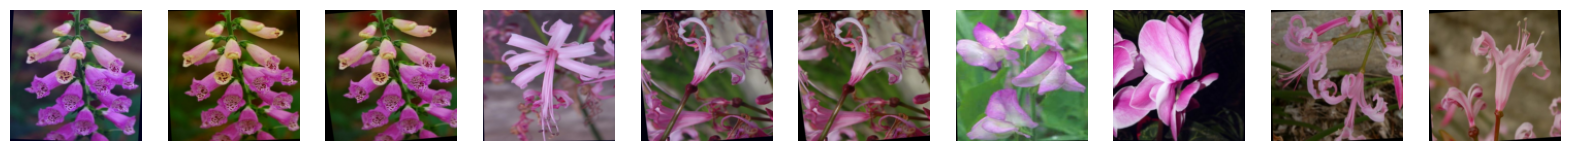

In [ ]:

import matplotlib.pyplot as plt
from torchvision import transforms as TF

import matplotlib.pyplot as plt
from torchvision import transforms as TF

def plot_image_tensors(image_tensors, rows=1, cols=10, figsize=(20, 15)):
    """
    Plot a list of image tensors in a grid layout.

    :param image_tensors: A list of image tensors to be plotted.
    :param rows: Number of rows in the grid layout.
    :param cols: Number of columns in the grid layout.
    :param figsize: Size of the figure (width, height) in inches.
    """
    num_images = len(image_tensors)
    for idx in range(num_images):
        image_tensors[idx] = reverse_normalization(simil[idx].permute(2,0,1)).permute(1,2,0)
    total_plots = rows * cols

    if total_plots < num_images:
        print(f"Warning: Number of images exceeds the grid size. Only plotting first {total_plots} images.")

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.4)

    for i in range(total_plots):
        if i < num_images:
            img_tensor = image_tensors[i].numpy()
            # img_pil = TF.to_pil_image(img_tensor)

            # Convert axes to a 2-dimensional array if there is only one row
            if rows == 1:
                ax = axes[i % cols]  # Access the correct subplot
            else:
                ax = axes[i // cols, i % cols]  # Access the correct subplot

            ax.imshow(img_tensor)
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

def reverse_normalization(normalized_image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """
    Reverse the normalization of an image.

    :param normalized_image: A tensor representing the normalized image.
    :param mean: List of mean values used in the normalization.
    :param std: List of standard deviation values used in the normalization.
    :return: The original image.
    """
    mean = torch.tensor(mean).unsqueeze(1).unsqueeze(1)
    std = torch.tensor(std).unsqueeze(1).unsqueeze(1)
    original_image = normalized_image * std + mean
    return original_image

simil = list(map(lambda t: t[0], similars))
plot_image_tensors(simil)

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as TF


def plot_image_tensors(image_tensors, rows=1, cols=1, figsize=(8, 8)):
    """
    Plot a list of image tensors in a grid layout.

    :param image_tensors: A list of image tensors to be plotted.
    :param rows: Number of rows in the grid layout.
    :param cols: Number of columns in the grid layout.
    :param figsize: Size of the figure (width, height) in inches.
    """
    num_images = len(image_tensors)
    total_plots = rows * cols

    if total_plots < num_images:
        print(f"Warning: Number of images exceeds the grid size. Only plotting first {total_plots} images.")

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.4)
    print(axes)
    for i in range(total_plots):
        if i < num_images:
            img_tensor = image_tensors[i].numpy()
            # img_pil = TF.to_pil_image(img_tensor)
            ax = axes[i // cols, i % cols]  # Access the correct subplot
            ax.imshow(img_tensor)
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()


simil = list(map(lambda t: t[0], similars))
plot_image_tensors(simil,rows=2,cols=5)

In [ ]:
simil[0].numpy()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[4])

In [ ]:
print(f"{"hello":.4f}")

SyntaxError: f-string: expecting '}' (729435865.py, line 1)

In [ ]:
dataset = test_loader.dataset
for x , y in dataset:
    print(x.shape,y)
    break

In [ ]:
# class AverageMeter(object):
#     def __init__(self,iterations):
#         self.iter = 0
#         self.iterations

#         self.reset()

#     def reset(self):
#         self.train_losses = np.zeros(self.iterations)
#         self.train_accuracies = np.zeros(self.iterations)
#         self.train_fscores = np.zeros(self.iterations)
#         self.valid_losses = np.zeros(self.iterations)
#         self.valid_accuracies = np.zeros(self.iterations)
#         self.valid_fscores = np.zeros(self.iterations)

#         self.train_center_losses = np.zeros(self.iterations)
#         self.train_cross_losses = np.zeros(self.iterations)
#         self.val_center_losses = np.zeros(self.iterations)
#         self.val_cross_losses = np.zeros(self.iterations)

#         self.valid_pair_fscores = np.zeros(self.iterations)
#         self.valid_pair_roc_aucs = np.zeros(self.iterations)
#         self.valid_pair_precisions = np.zeros(self.iterations)
#         self.valid_pair_recalls = np.zeros(self.iterations)

#         self.cos_sim_1 = np.zeros(self.iterations)
#         self.cos_sim_0 = np.zeros(self.iterations)

#     def update(self,data_dict):
#         self.cos_sim_1[self.iter] = data_dict['val_is_similar']
#         self.cos_sim_0[self.iter] = data_dict['val_not_similar']
#         self.valid_pair_fscores[self.iter] = data_dict['val_pair_f1']
#         self.valid_pair_roc_aucs[self.iter] = data_dict['val_pair_roc_auc']
#         self.valid_pair_precisions[self.iter] = data_dict['val_pair_precision']
#         self.valid_pair_recalls[self.iter] = data_dict['val_pair_recall']
#         self.train_losses[self.iter] = data_dict['train_loss']
#         self.train_center_losses[self.iter] = data_dict['train_center_loss']
#         self.train_cross_losses[self.iter] = data_dict['train_cross_loss']
#         self.val_center_losses[self.iter] = data_dict['val_center_loss']
#         self.val_cross_losses[self.iter] = data_dict['val_cross_loss']
#         self.train_accuracies[self.iter] = data_dict['train_acc']
#         self.train_fscores[self.iter] = data_dict['train_f1']
#         self.valid_losses[self.iter] = data_dict['val_loss']
#         self.valid_fscores[self.iter] = data_dict['val_f1']

#         # increase iteration(epoch) plus one
#         self.iter+=1


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_L_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_L_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://do

KeyboardInterrupt: 